In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

In [10]:
# Data
data_packets = [
    {
        "task": "AV (intersection)",
        "failure_level": 11,
        "methods": ["GD", "L2C", "$R_0$", "$R_1$"],
        "test_mean": np.array([12.9, 11.5, 11.2, 10.9]),
        "test_max": np.array([12.9, 13.4, 13.2, 12.4]),
        "predicted_mean": np.array([12.9, 11.49, 11.14, 10.87]),
        "predicted_max": np.array([12.9, 13.2, 13, 11.4]),
    },
    {
        "task": "AV (highway)",
        "failure_level": 7.5,
        "methods": ["GD", "L2C", "$R_0$", "$R_1$"],
        "test_mean": np.array([7.68, 6.971, 7.049, 7.007]),
        "test_max": np.array([8.42, 8.91, 8.05, 8.58]),
        "predicted_mean": np.array([6.92, 6.86, 7.31, 6.91]),
        "predicted_max": np.array([9.0, 7.5, 8.75, 8.1]),
    },
]

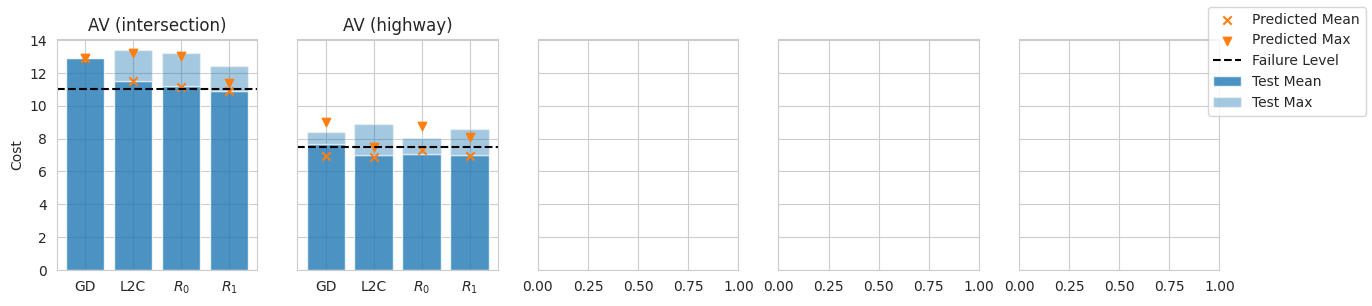

In [12]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3), sharey=True)
axes[0].set_ylabel("Cost")

for i, data in enumerate(data_packets):
    task = data["task"]
    failure_level = data["failure_level"]
    method = data["methods"]
    test_mean = data["test_mean"]
    test_max = data["test_max"]
    predicted_mean = data["predicted_mean"]
    predicted_max = data["predicted_max"]
    
    axes[i].set_title(task)
    axes[i].bar(method, test_mean, label=None if i > 0 else "Test Mean", color="C0", alpha=0.8)
    axes[i].bar(method, test_max - test_mean, label=None if i > 0 else "Test Max", color="C0", alpha=0.4, bottom=test_mean)
    axes[i].scatter(method, predicted_mean, label=None if i > 0 else "Predicted Mean", color="C1", marker="x")
    axes[i].scatter(method, predicted_max, label=None if i > 0 else "Predicted Max", color="C1", marker="v")
    axes[i].axhline(failure_level, color="k", linestyle="--", label=None if i > 0 else "Failure Level")

fig.legend()

In [19]:
# predicted failure rate - true failure rate
gt_fr = {
    "hw": {
        "GD": 0.44,
        "L2C": 0.12 ,
        "$R_0$": 0.056,
        "$R_1$":0.056 
    },
    "int": {
        "GD": 1.0,
        "L2C": 0.82,
        "$R_0$": 0.51,
        "$R_1$": 0.43,
    },
    "drone_static": {
        "GD": 0.27,
        "L2C":0.17 ,
        "$R_0$": 0.21,
        "$R_1$": 0.078,
    },
    "drone_dynamic": {
        "GD": 0.26,
        "L2C": 0.27,
        "$R_0$": 0.31,
        "$R_1$": 0.16,
    },
    "mug": {
        "GD": 0.0088,
        "L2C": 0.0088,
        "$R_0$": 0.004,
        "$R_1$": 0.0028,
    },
    "box": {
        "GD": 0.011,
        "L2C": 0.011,
        "$R_0$": 0.0045,
        "$R_1$": 0.0035,
    }
}
data = {
    "hw": {
        "GD": np.array([0.16, 0, -0.108, -0.208]),
        "L2C": np.array([0.299, 0.088, -0.128, -0.143]),
        "$R_0$": np.array([0, 0, -0.008, -0.015]),
        "$R_1$": np.array([0.055, 0, -0.006, -0.072]),
    },
    "int": {
        "GD": np.array([0, 0, 0, 0.0]),
        "L2C": np.array([0.239, 0.097, 0.023, -0.169]),
        "$R_0$": np.array([0, -0.008, -0.015, -0.018]),
        "$R_1$": np.array([0.194, -0.06, -0.179, -0.331]),
    },
    "drone_static": {
        "GD": np.array([0.037, -0.035, -0.037, -0.06]),
        "L2C": np.array([0.23, 0.229, 0.22, -0.15]),
        "$R_0$": np.array([0.665, 0.423, 0.364, 0.313]),
        "$R_1$": np.array([0.12, -0.036, -0.097, -0.098]),
    },
    "drone_dynamic": {
        "GD": np.array([0.286, 0.001, -0.147, -0.187]),
        "L2C": np.array([0.144, -0.064, -0.266, -0.286]),
        "$R_0$": np.array([0.659, 0.334, 0.2, -0.02]),
        "$R_1$": np.array([0.075, 0.145, 0.249, 0.306]),
    },
    "mug": {
        "GD": np.array([-0.008, -0.011, -0.012, -0.014]),
        "L2C": np.array([-0.008, -0.011, -0.012, -0.014]),
        "$R_0$": np.array([0, 0, -0.005, -0.013]),
        "$R_1$": np.array([0, 0, -0.005, -0.009]),
    },
    "box": {
        "GD": np.array([-0.007, -0.009, -0.009, -0.01]),
        "L2C": np.array([-0.007, -0.009, -0.009, -0.01]),
        "$R_0$": np.array([0, -0.003, -0.005, -0.008]),
        "$R_1$": np.array([0, 0, -0.003, -0.008]),
    }
}

algs = list(data["box"].keys())
tasks = list(data.keys())

tab_str = ""
for alg in algs:
    tab_str += f"{alg}"
    for task in tasks:
        err = data[task][alg]
        fr = gt_fr[task][alg]
        tab_str += f" & ${err.mean() / fr:.2f}$\%$_{{{err.std() / fr:.2f}}}$"
    
    tab_str += " \\\\\n"

print(tab_str)

for task in data.keys():
    print(f"MRE of predicted and true failure rates on {task}")
    for alg in data[task]:
        err = data[task][alg]
        fr = gt_fr[task][alg]
        # err = np.abs(err)
        print(f"\t{alg}: {err.mean() / fr:.2} +/- {err.std() / fr:.2}")

GD & $-0.09$\%$_{0.31}$ & $0.00$\%$_{0.00}$ & $-0.09$\%$_{0.13}$ & $-0.05$\%$_{0.71}$ & $-1.28$\%$_{0.25}$ & $-0.80$\%$_{0.10}$ \\
L2C & $0.24$\%$_{1.51}$ & $0.06$\%$_{0.18}$ & $0.78$\%$_{0.96}$ & $-0.44$\%$_{0.65}$ & $-1.28$\%$_{0.25}$ & $-0.80$\%$_{0.10}$ \\
$R_0$ & $-0.10$\%$_{0.11}$ & $-0.02$\%$_{0.01}$ & $2.10$\%$_{0.64}$ & $0.95$\%$_{0.79}$ & $-1.12$\%$_{1.33}$ & $-0.89$\%$_{0.65}$ \\
$R_1$ & $-0.10$\%$_{0.80}$ & $-0.22$\%$_{0.45}$ & $-0.36$\%$_{1.14}$ & $1.21$\%$_{0.56}$ & $-1.25$\%$_{1.35}$ & $-0.79$\%$_{0.93}$ \\

MRE of predicted and true failure rates on hw
	GD: -0.089 +/- 0.31
	L2C: 0.24 +/- 1.5
	$R_0$: -0.1 +/- 0.11
	$R_1$: -0.1 +/- 0.8
MRE of predicted and true failure rates on int
	GD: 0.0 +/- 0.0
	L2C: 0.058 +/- 0.18
	$R_0$: -0.02 +/- 0.014
	$R_1$: -0.22 +/- 0.45
MRE of predicted and true failure rates on drone_static
	GD: -0.088 +/- 0.13
	L2C: 0.78 +/- 0.96
	$R_0$: 2.1 +/- 0.64
	$R_1$: -0.36 +/- 1.1
MRE of predicted and true failure rates on drone_dynamic
	GD: -0.045 +